# Bank marketing data project
                                                                         created by Christian Coffrant

In this project we will explore the a data set which was created from the results of a telemarketing campaign conducted in 2011. The campaign comprised of telemarketers from a bank contacting 45211 customers and offering them a term deposit account. 

The data contained in this data set can be put into three categories, the first is the bank client data, this contains the age, job, marital, education, default, balance, housing, and loan variables. The second category is data relating to the banks previous marketing campaign, it contains the variables contact, day, month, and duration. The third category is other attributes, it contains campaign, pdays, previous, and poutcome. 

And finally the output variable is stored as y, it tells us whether or not the client subscribed to a term deposit.

We will start off by importing the required libaries

In [273]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
%matplotlib inline

We then import the banking data as a dataframe using pandas

In [4]:
bank = pd.read_csv('bank-full.csv', delimiter=';')

We will look at the head, description, and data types of the data

In [5]:
print(bank.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Exploratory data analysis

Now that we have an idea of the shape and structure of our data we will look into the individual features

## Output variable - y

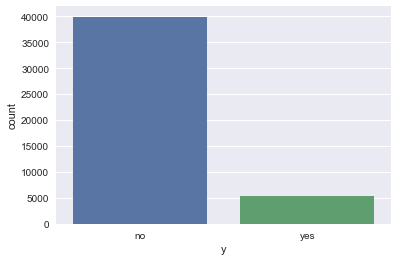

In [8]:
# Y - This is our binary output variable, it tells us has the client subscribed a term deposit?
sns.countplot(x="y", data=bank)

In [9]:
# Proportion of yes/no

# we'll start off by counting the total number of people who did and didn't subscribe
ycount = bank['y'].value_counts()
# we need to count the number of total observations
rowcount = bank.shape[0]-1

print('Proportion yes: ' + '{0:2.3f}'.format((ycount[1]/rowcount)))
print('Proportion no: ' + '{0:2.3f}'.format((ycount[0]/rowcount)))

# We'll save the overall proportion of successes as the variable expected, this will help us with our chi squared tests
expected = ycount[1]/rowcount

Proportion yes: 0.117
Proportion no: 0.883


## Age

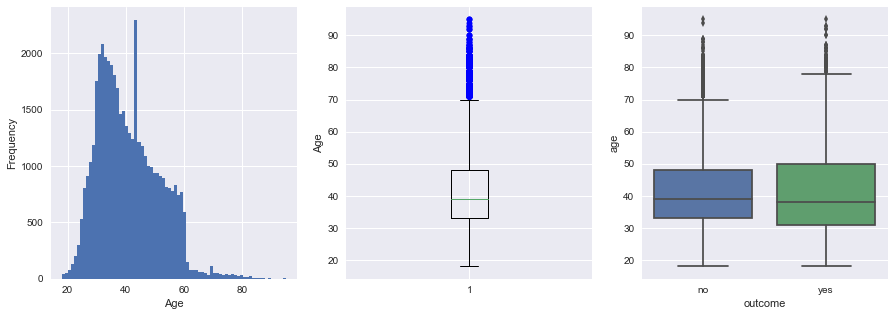

In [10]:
# AGE - This is the age of the customers contacted

plt.subplot(1, 3, 1)
ageplt = bank.age.plot( kind='hist', bins = 74, figsize=(15,5))
plt.xlabel('Age')

plt.subplot(1, 3, 2)
agebox = plt.boxplot(bank.age, 0, 'b')
plt.ylabel('Age')

plt.subplot(1, 3, 3)
agebox2 = sns.boxplot(x="y", y="age", data=bank)
agebox2.set(xlabel='outcome')

In [85]:
# Logistic regression, we perform a logistic regression on the age variable to get a gauge on how important it is on the outcome variable

df = pd.read_csv('bank-full.csv', delimiter=';')
X = bank.loc[:,'age']
y = bank.loc[:,'y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
y_train = pd.get_dummies(y_train)
y_train = y_train.drop(['yes'], axis=1)
m = sm.Logit(y_train, X_train)
results = m.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.127158
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                     no   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31646
Method:                           MLE   Df Model:                            0
Date:                Tue, 02 Jan 2018   Pseudo R-squ.:                 -0.1512
Time:                        14:26:06   Log-Likelihood:                -4024.2
converged:                       True   LL-Null:                       -3495.8
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0480      0.000    110.265      0.000       0.047       0.049


In [12]:
# T test, we'll also conduct a t-test to see the statistical significance between the age of the customers who subscribed vs those who didn't

ageyes = bank['age'].loc[bank['y'] == 'yes']
ageno = bank['age'].loc[bank['y'] == 'no']

t = abs(np.mean(ageyes)-np.mean(ageno))/(math.sqrt(((np.std(ageyes)**2)/len(ageyes))+((np.std(ageno)**2)/len(ageno))))
print('t-value: ' +str(t))

t-value: 4.318701093196275


## Job

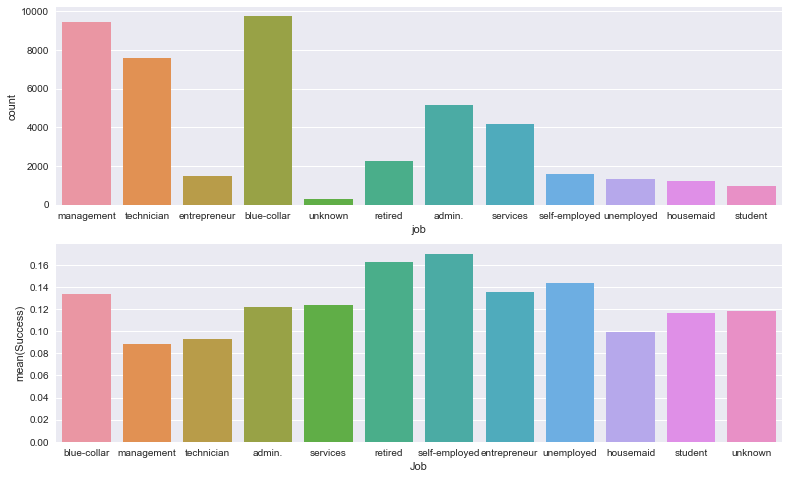

In [156]:
# Job - is the type of job of each of the customers
# We first graph the job titles and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="job", data=bank)

# We then want to graph the which shows how successful the campaign was with each job category, to do this we first need to build a data frame which shows the proportion of success, grouped by job
jobsuccess = bank['job'].loc[bank['y']== 'yes'].value_counts()
jobcount = bank['job'].value_counts()
X = pd.DataFrame(columns=['Job','Success'])

Job=[]
Success=[]
for item in range(len(jobcount)):
    Job.append(jobcount.keys()[item])
    Success.append(jobsuccess[item]/jobcount[item])

Proportion = {'Job':Job, 'Success':Success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='Job', y='Success', data=X)

## Marital

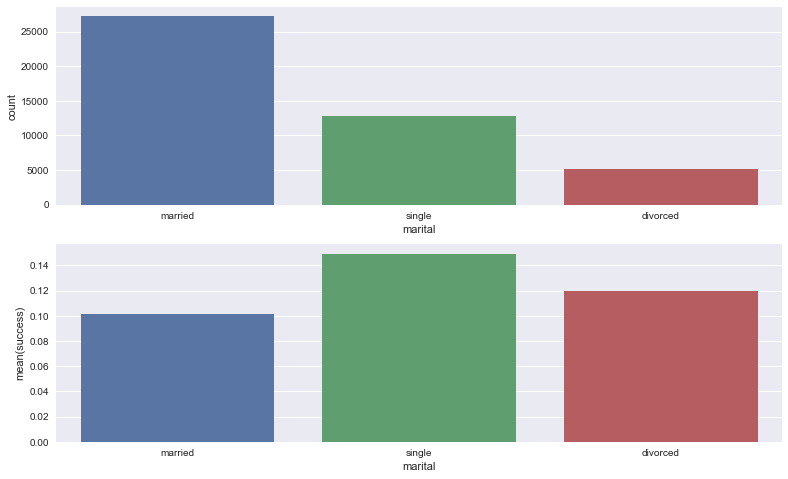

In [157]:
# Marital - Is the marital status of the customers
# We first graph the Marital Status and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="marital", data=bank)

# We then want to graph the which shows how successful the campaign was with each marital category, to do this we first need to build a data frame which shows the proportion of success, grouped by marital status
maritalsuccess = bank['marital'].loc[bank['y']== 'yes'].value_counts()
maritalcount = bank['marital'].value_counts()
X = pd.DataFrame(columns=['marital','Success'])

marital=[]
success=[]
for item in range(len(maritalcount)):
    marital.append(maritalcount.keys()[item])
    success.append(maritalsuccess[item]/maritalcount[item])

Proportion = {'marital':marital, 'success':success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='marital', y='success', data=X)

In [158]:
#Chi squared test, to test the statistical significance of the variable on the outcome

sum = 0

for item in range(len(maritalcount)):
    sum += (((maritalsuccess[item]/maritalcount[item])-expected)**2)/expected

print('Test statistic: ' + str(sum))

Test statistic: 0.0112043829299


## Education

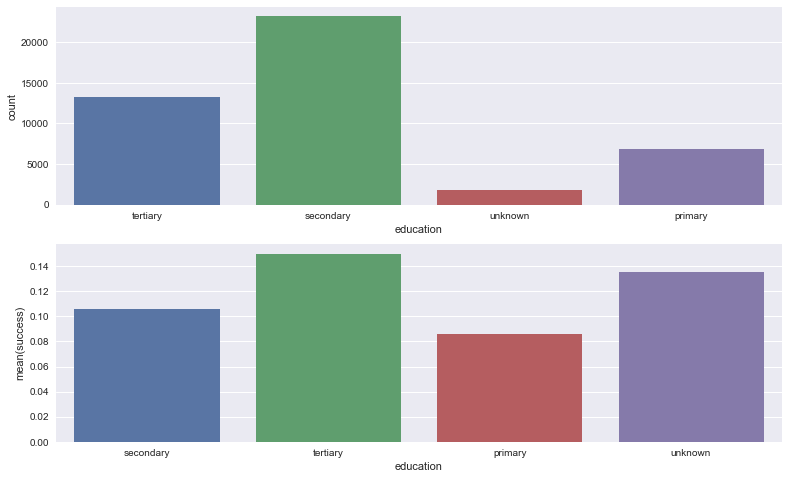

In [155]:
# Education - Is the level of education of the customer# We first graph the education level and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="education", data=bank)

# We then want to graph the which shows how successful the campaign was with each education level, to do this we first need to build a data frame which shows the proportion of success, grouped education level
educationsuccess = bank['education'].loc[bank['y']== 'yes'].value_counts()
educationcount = bank['education'].value_counts()
X = pd.DataFrame(columns=['education','Success'])

education=[]
success=[]
for item in range(len(educationcount)):
    education.append(educationcount.keys()[item])
    success.append(educationsuccess[item]/educationcount[item])

Proportion = {'education':education, 'success':success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='education', y='success', data=X)

In [130]:
#Chi squared test, to test the statistical significance of the variable on the outcome

sum = 0

for item in range(len(educationcount)):
    sum += (((educationsuccess[item]/educationcount[item])-expected)**2)/expected

print('Test statistic: ' + str(sum))

Test statistic: 0.0215236925953


## Default

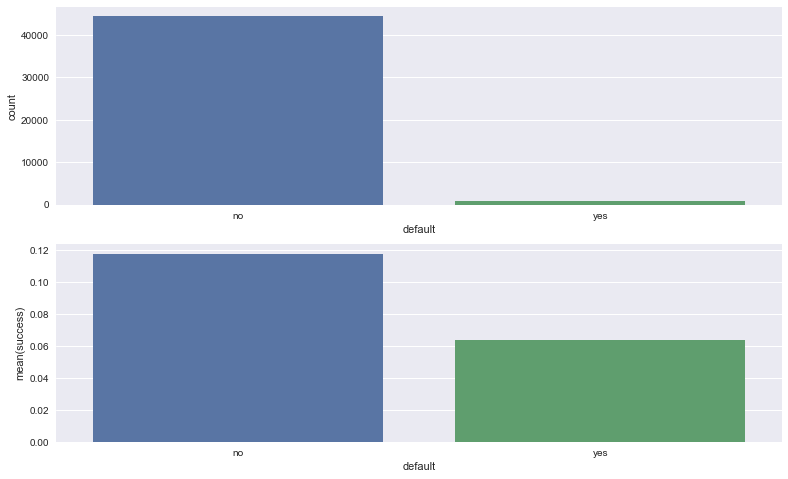

In [160]:
# Default - has credit in default?
# We first graph the Default categories and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="default", data=bank)

# We then want to graph the which shows how successful the campaign was with each default category, to do this we first need to build a data frame which shows the proportion of success, grouped by default status
defaultsuccess = bank['default'].loc[bank['y']== 'yes'].value_counts()
defaultcount = bank['default'].value_counts()
X = pd.DataFrame(columns=['default','Success'])

default=[]
success=[]
for item in range(len(defaultcount)):
    default.append(defaultcount.keys()[item])
    success.append(defaultsuccess[item]/defaultcount[item])

Proportion = {'default':default, 'success':success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='default', y='success', data=X)

## Balance

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


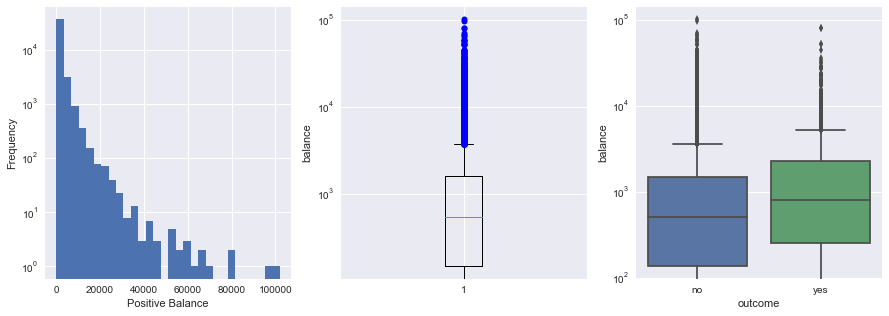

In [239]:
# Balance - average yearly balance, in euros, we will split the data into accounts with positive and negative balances
nbalance = bank.loc[bank['balance']<0]
nbalance['balance'] = nbalance['balance'].apply(lambda x: x*-1)
pbalance = bank.loc[bank['balance']>=0]

# We will now look at the positive balances
plt.subplot(1, 3, 1)
balanceplt = pbalance.balance.plot( kind='hist', bins = 30, figsize=(15,5))
plt.xlabel('Positive Balance')
balanceplt.set_yscale('log')

plt.subplot(1, 3, 2)
balancebox = plt.boxplot(pbalance.balance, 0, 'b')
plt.ylabel('balance')
plt.yscale('log')

plt.subplot(1, 3, 3)
balancebox2 = sns.boxplot(x="y", y="balance", data=pbalance)
balancebox2.set(xlabel='outcome')
plt.yscale('log')

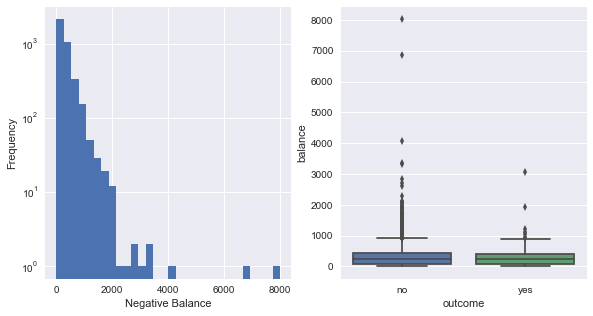

In [241]:
plt.subplot(1, 3, 1)
balanceplt = nbalance.balance.plot( kind='hist', bins = 30, figsize=(15,5))
plt.xlabel('Negative Balance')
balanceplt.set_yscale('log')

plt.subplot(1, 3, 2)
#balancebox = plt.boxplot(nbalance.balance, 0, 'b')

plt.subplot(1, 3, 2)
balancebox2 = sns.boxplot(x="y", y="balance", data=nbalance)
balancebox2.set(xlabel='outcome')


In [86]:
# Logistic regression, we perform a logistic regression on the balance variable to get a gauge on how important it is on the outcome variable

df = pd.read_csv('bank-full.csv', delimiter=';')
X = bank.loc[:,'balance']
y = bank.loc[:,'y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
y_train = pd.get_dummies(y_train)
y_train = y_train.drop(['yes'], axis=1)
m = sm.Logit(y_train, X_train)
results = m.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.648499
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                     no   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31646
Method:                           MLE   Df Model:                            0
Date:                Tue, 02 Jan 2018   Pseudo R-squ.:                  -4.893
Time:                        14:27:50   Log-Likelihood:                -20523.
converged:                       True   LL-Null:                       -3482.6
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
balance        0.0005   9.44e-06     49.379      0.000       0.000       0.000


## Housing

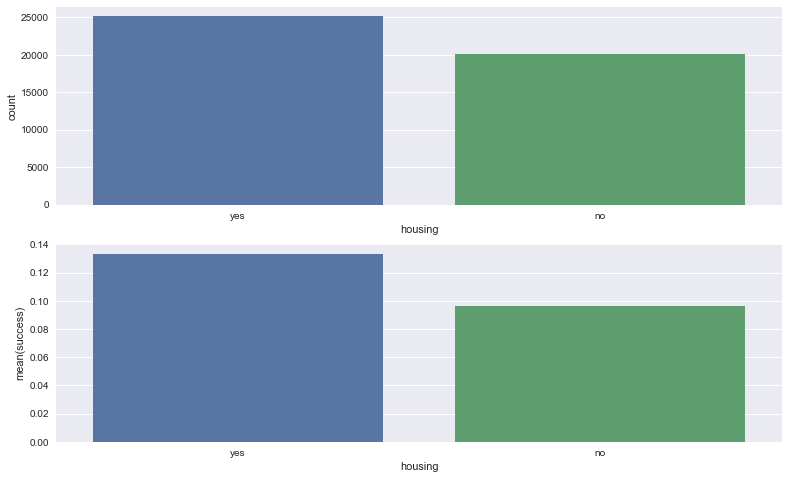

In [161]:
# Housing - Does the customer have a housing loan
# We first graph the Housing loan status and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="housing", data=bank)

# We then want to graph the which shows how successful the campaign was with each Housing loan status, to do this we first need to build a data frame which shows the proportion of success, grouped by Housing loan status
housingsuccess = bank['housing'].loc[bank['y']== 'yes'].value_counts()
housingcount = bank['housing'].value_counts()
X = pd.DataFrame(columns=['housing','Success'])

housing=[]
success=[]
for item in range(len(housingcount)):
    housing.append(housingcount.keys()[item])
    success.append(housingsuccess[item]/housingcount[item])

Proportion = {'housing':housing, 'success':success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='housing', y='success', data=X)

In [146]:
#Chi squared test, to test the statistical significance of the variable on the outcome
sum = 0

for item in range(len(housingcount)):
    sum += (((housingsuccess[item]/housingcount[item])-expected)**2)/expected

print('Summary statistic: ' + str(sum))

Summary statistic: 0.00595828021324


## Loan

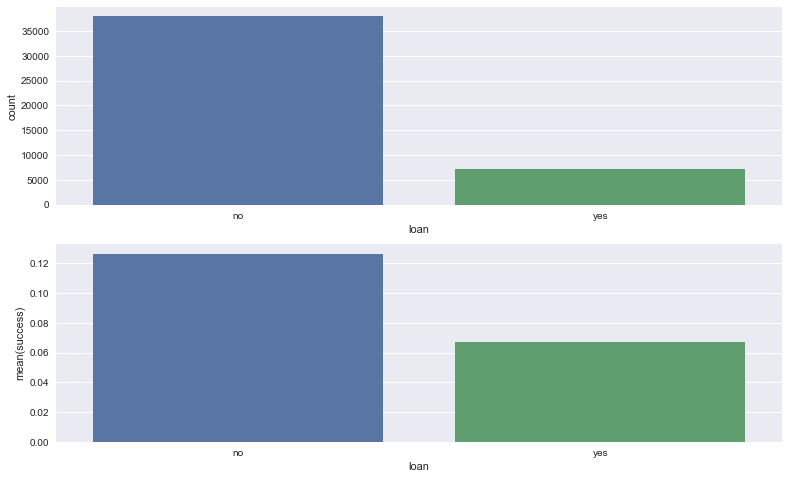

In [162]:
# Loan - has personal loan?
# We first graph the Personal loan Status and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="loan", data=bank)

# We then want to graph the which shows how successful the campaign was with each Personal loan Status, to do this we first need to build a data frame which shows the proportion of success, grouped by Personal loan Status
loansuccess = bank['loan'].loc[bank['y']== 'yes'].value_counts()
loancount = bank['loan'].value_counts()
X = pd.DataFrame(columns=['loan','Success'])

loan=[]
success=[]
for item in range(len(loancount)):
    loan.append(loancount.keys()[item])
    success.append(loansuccess[item]/loancount[item])

Proportion = {'loan':loan, 'success':success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='loan', y='success', data=X)

In [132]:
#Chi squared test, to test the statistical significance of the variable on the outcome

sum = 0

for item in range(len(loancount)):
    sum += (((loansuccess[item]/loancount[item])-expected)**2)/expected

print('Summary statistic: '+ str(sum))

Summary statistic: 0.0223012103587


## Contact

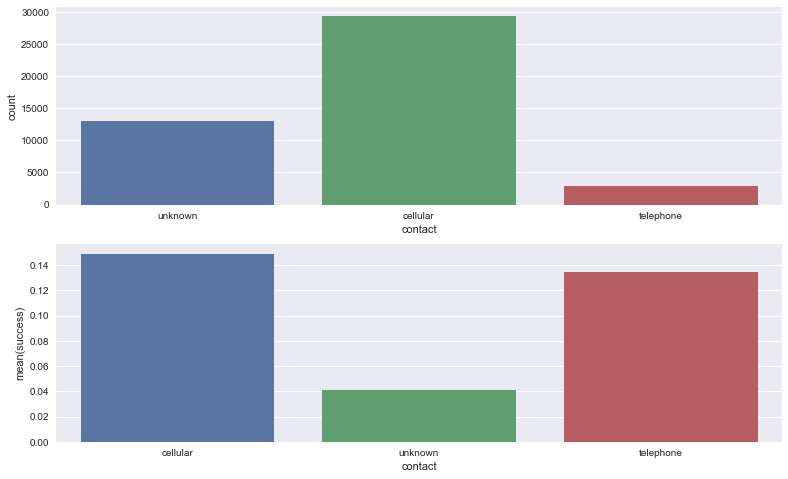

In [163]:
# Contact - contact communication method
# We first graph the contact method and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="contact", data=bank)

# We then want to graph the which shows how successful the campaign was with each contact method, to do this we first need to build a data frame which shows the proportion of success, grouped by contact method
contactsuccess = bank['contact'].loc[bank['y']== 'yes'].value_counts()
contactcount = bank['contact'].value_counts()
X = pd.DataFrame(columns=['contact','Success'])

contact=[]
success=[]
for item in range(len(contactcount)):
    contact.append(contactcount.keys()[item])
    success.append(contactsuccess[item]/contactcount[item])

Proportion = {'contact':contact, 'success':success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='contact', y='success', data=X)

In [133]:
#Chi squared test, to test the statistical significance of the variable on the outcome

sum = 0

for item in range(len(contactcount)):
    sum += (((contactsuccess[item]/contactcount[item])-expected)**2)/expected

print('Summary statistic: ' + str(sum))

Summary statistic: 0.0611360881474


## Day

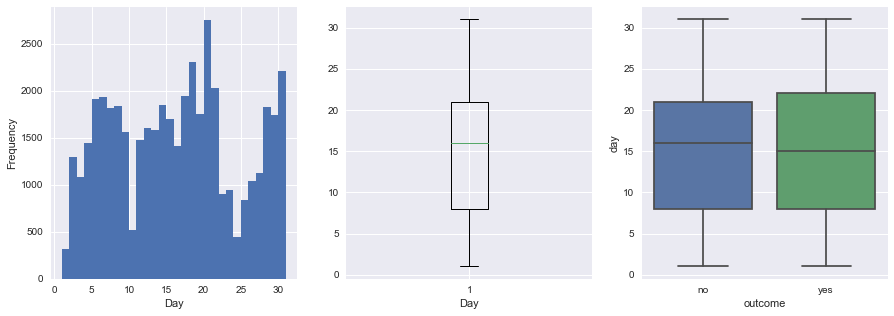

In [29]:
# Day - last contact day of the month

plt.subplot(1, 3, 1)
dayplt = bank.day.plot( kind='hist', bins = 30, figsize=(15,5))
plt.xlabel('Day')

plt.subplot(1, 3, 2)
daybox = plt.boxplot(bank.day, 0, 'b')
plt.xlabel('Day')

plt.subplot(1, 3, 3)
daybox2 = sns.boxplot(x="y", y="day", data=bank)
daybox2.set(xlabel='outcome')

## Month

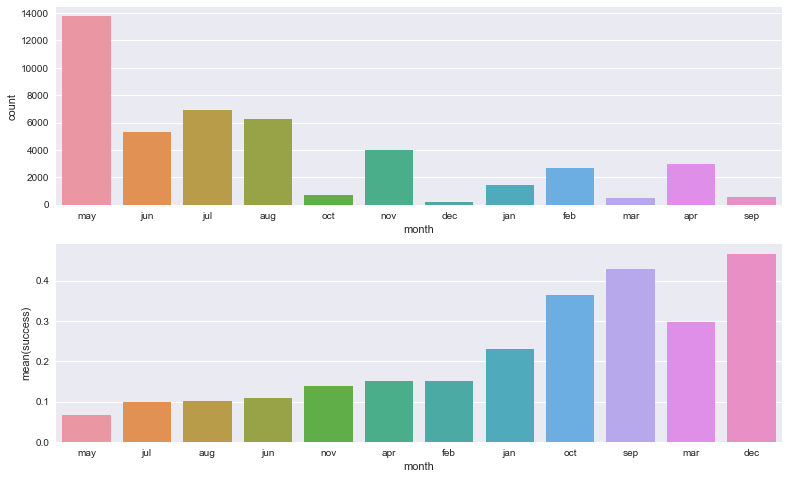

In [164]:
# Month - last contact month of year
# We first graph the Month and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="month", data=bank)

# We then want to graph the which shows how successful the campaign was by month, to do this we first need to build a data frame which shows the proportion of success, grouped by month
monthsuccess = bank['month'].loc[bank['y']== 'yes'].value_counts()
monthcount = bank['month'].value_counts()
X = pd.DataFrame(columns=['month','Success'])

month=[]
success=[]
for item in range(len(monthcount)):
    month.append(monthcount.keys()[item])
    success.append(monthsuccess[item]/monthcount[item])

Proportion = {'month':month, 'success':success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='month', y='success', data=X)

In [134]:
#Chi squared test, to test the statistical significance of the variable on the outcome

sum = 0

for item in range(len(monthcount)):
    sum += (((monthsuccess[item]/monthcount[item])-expected)**2)/expected

print('Test statistic: ' + str(sum))

Test statistic: 2.84036733626


## Duration

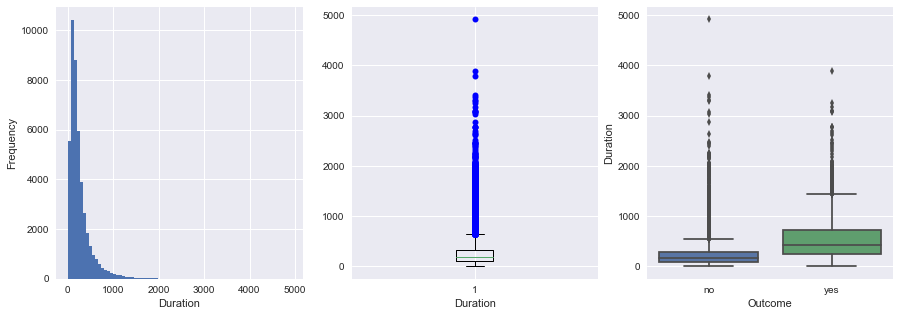

In [32]:
# Duration - last contact duration, in seconds

plt.subplot(1, 3, 1)
durationplt = bank.duration.plot( kind='hist', bins = 74, figsize=(15,5))
plt.xlabel('Duration')

plt.subplot(1, 3, 2)
durationbox = plt.boxplot(bank.duration, 0, 'b')
plt.xlabel('Duration')

plt.subplot(1, 3, 3)
durationbox2 = sns.boxplot(x="y", y="duration", data=bank)
durationbox2.set(xlabel='Outcome')
durationbox2.set(ylabel='Duration')

In [88]:
# Logistic regression, we perform a logistic regression on the duration variable to get a gauge on how important it is on the outcome variable

df = pd.read_csv('bank-full.csv', delimiter=';')
X = bank.loc[:,'duration']
y = bank.loc[:,'y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
y_train = pd.get_dummies(y_train)
y_train = y_train.drop(['yes'], axis=1)
m = sm.Logit(y_train, X_train)
results = m.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.408392
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     no   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31646
Method:                           MLE   Df Model:                            0
Date:                Tue, 02 Jan 2018   Pseudo R-squ.:                  -2.727
Time:                        14:29:19   Log-Likelihood:                -12924.
converged:                       True   LL-Null:                       -3467.7
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
duration       0.0028    4.7e-05     59.066      0.000       0.003       0.003


## Campaign

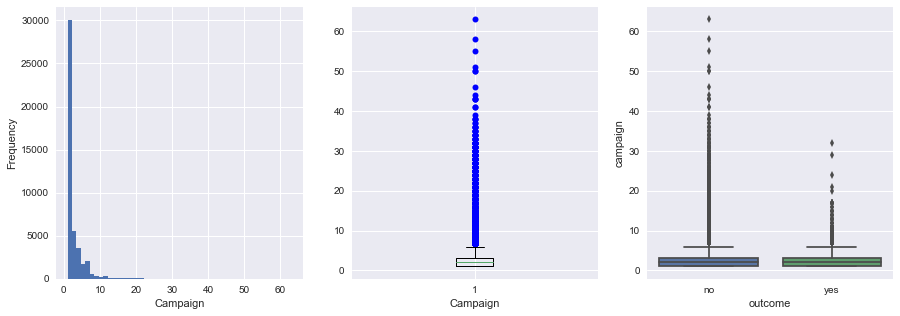

In [34]:
# Campaign - number of contacts performed during this campaign and for this client

plt.subplot(1, 3, 1)
campplt = bank.campaign.plot( kind='hist', bins = 50, figsize=(15,5))
plt.xlabel('Campaign')

plt.subplot(1, 3, 2)
campbox = plt.boxplot(bank.campaign, 0, 'b')
plt.xlabel('Campaign')

plt.subplot(1, 3, 3)
campbox2 = sns.boxplot(x="y", y="campaign", data=bank)
campbox2.set(xlabel='outcome')

## Pdays

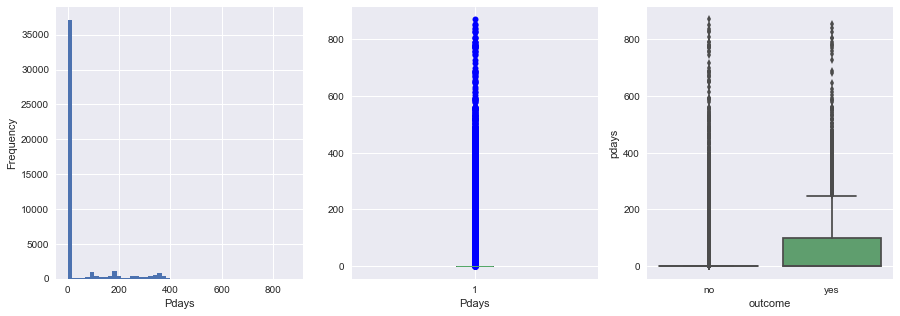

In [35]:
# Pdays - number of days that passed by after the client was last contacted from a previous campaign, note -1 means not previously contacted

plt.subplot(1, 3, 1)
pdaysplt = bank.pdays.plot( kind='hist', bins = 50, figsize=(15,5))
plt.xlabel('Pdays')

plt.subplot(1, 3, 2)
pdaysbox = plt.boxplot(bank.pdays, 0, 'b')
plt.xlabel('Pdays')

plt.subplot(1, 3, 3)
pdaysbox2 = sns.boxplot(x="y", y="pdays", data=bank)
pdaysbox2.set(xlabel='outcome')

In [90]:
# Logistic regression, we perform a logistic regression on the Pdays variable to get a gauge on how important it is on the outcome variable

df = pd.read_csv('bank-full.csv', delimiter=';')
X = bank.loc[:,'pdays']
y = bank.loc[:,'y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
y_train = pd.get_dummies(y_train)
y_train = y_train.drop(['yes'], axis=1)
m = sm.Logit(y_train, X_train)
results = m.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.672557
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     no   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31646
Method:                           MLE   Df Model:                            0
Date:                Tue, 02 Jan 2018   Pseudo R-squ.:                  -5.144
Time:                        14:30:08   Log-Likelihood:                -21284.
converged:                       True   LL-Null:                       -3464.2
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pdays          0.0050      0.000     35.811      0.000       0.005       0.005


## Previous

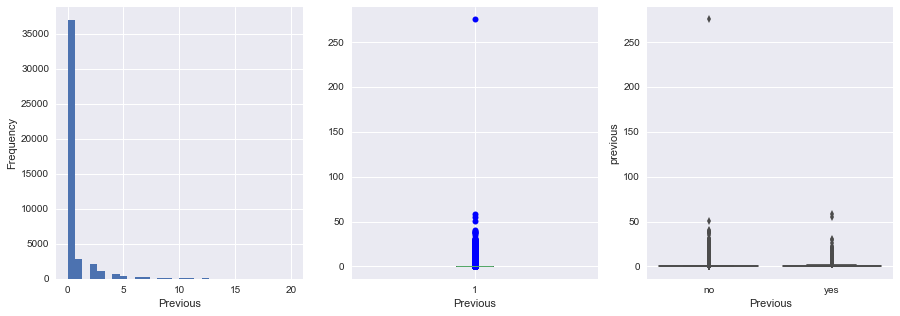

In [37]:
# Previous - number of contacts performed before this campaign and for this client

plt.subplot(1, 3, 1)
prevplt = bank.previous.plot( kind='hist', bins = 30, range=(0,20), figsize=(15,5))
plt.xlabel('Previous')

plt.subplot(1, 3, 2)
prevbox = plt.boxplot(bank.previous, 0, 'b')
plt.xlabel('Previous')

plt.subplot(1, 3, 3)
prevbox2 = sns.boxplot(x="y", y="previous", data=bank)
prevbox2.set(xlabel='Previous')

## Poutcome

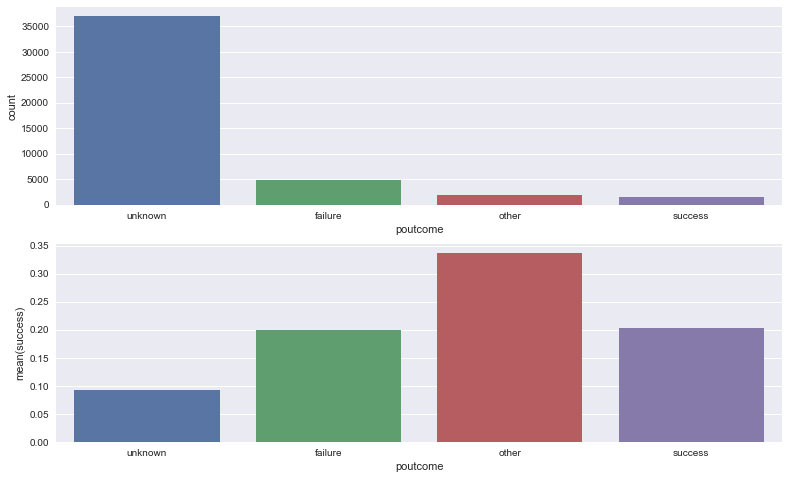

In [165]:
# Poutcome - Outcome of the previous marketing campaign
# We first graph the previous outcomes and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="poutcome", data=bank)

# We then want to graph the which shows how successful the campaign was with previous outcome category, to do this we first need to build a data frame which shows the proportion of success, grouped by previous outcome
poutcomesuccess = bank['poutcome'].loc[bank['y']== 'yes'].value_counts()
poutcomecount = bank['poutcome'].value_counts()
X = pd.DataFrame(columns=['poutcome','Success'])

poutcome=[]
success=[]
for item in range(len(poutcomecount)):
    poutcome.append(poutcomecount.keys()[item])
    success.append(poutcomesuccess[item]/poutcomecount[item])

Proportion = {'poutcome':poutcome, 'success':success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='poutcome', y='success', data=X)

In [135]:
# Chi squared test, to test the statistical significance of the variable on the outcome

sum = 0

for item in range(len(poutcomecount)):
    sum += (((poutcomesuccess[item]/poutcomecount[item])-expected)**2)/expected

print('Test statistic ' + str(sum))

Test statistic 0.536797397288
